In [1]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../src')

import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

from utils.formatter import get_energy, get_usetime
from utils.functions import load_datasets_from_csv, lists_to_dict

from paths import ROOT_DIR, FXD_DB_DIR, FLLD_DB_DIR
IMG_PATH = ROOT_DIR+'/img/waste' 

if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
dts = load_datasets_from_csv(FXD_DB_DIR).copy()

In [3]:
air = dts['air']

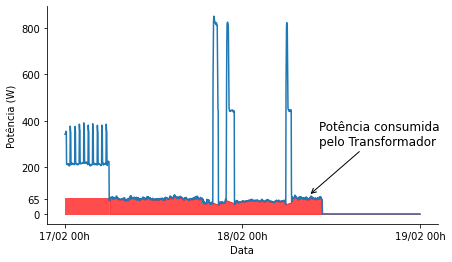

In [4]:
a = dt.datetime.strptime('2021-02-18 09:00:00.000000', '%Y-%m-%d %H:%M:%S.%f')
df = air[(air.index > "2021-02-17 00:00:00") & (air.index <= "2021-02-19 00:00:00")]

fig, ax = plt.subplots(figsize=(7,4), sharex=True)

sns.set_style({'font.family':'sans', 'font.serif':'Helvetica'})
sns.set_context(rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

gair = sns.lineplot(x=df.index, y=df['Pwr'], ax= ax)
ax.set_ylabel("Potência (W)")
ax.set_xlabel("Data")
#plt.text(0.5, 0.5, 'Some text', transform=ax.transAxes)

to_fill = df['Pwr'] <= 80
h = df['Pwr'].loc[to_fill]

plt.fill_between(h.index, 0 , h, color='r', alpha=0.7)

plt.axvspan('2021-02-17 00:00:00.000000', '2021-02-17 05:58:00.000000', ymin = 0.0427701,ymax=0.12, facecolor='red', alpha=0.7)

ax.annotate('Potência consumida\npelo Transformador', (a, 80), xytext=(10, 50), 
            textcoords='offset points', arrowprops=dict(arrowstyle='->'))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %Hh'))
sns.despine()
plt.yticks([0, 65, 200, 400, 600, 800])


plt.savefig(IMG_PATH+"/air_waste.svg", dpi=600, pad_inches=0.05, bbox_inches='tight')
plt.savefig(IMG_PATH+"/air_waste.png", dpi=600, pad_inches=0.05, bbox_inches='tight')

In [5]:
air_pwr = air['Pwr']
air_old = air['Pwr'].copy()

In [6]:
tr = (air_pwr > 20) & (air_pwr <=90)
tr_air = air_pwr > 90
u_tr = air_pwr[tr].mean()

In [7]:
air_pwr[tr] -= air_pwr[tr]

In [8]:
air_pwr[tr_air] -= u_tr

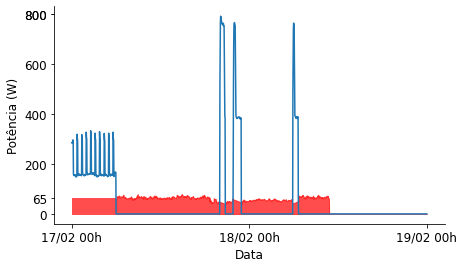

In [9]:
df = air[(air.index > "2021-02-17 00:00:00") & (air.index <= "2021-02-19 00:00:00")]
fig, ax = plt.subplots(figsize=(7,4), sharex=True)

gair = sns.lineplot(x=df.index, y=df['Pwr'], ax= ax)
ax.set_ylabel("Potência (W)")
ax.set_xlabel("Data")
#plt.text(0.5, 0.5, 'Some text', transform=ax.transAxes)

plt.fill_between(h.index, 0 , h, color='r', alpha=0.7)


plt.axvspan('2021-02-17 00:00:00.000000', '2021-02-17 05:58:00.000000', ymin = 0.0427701,ymax=0.12, facecolor='red', alpha=0.7)

'''plt.axvspan('2021-02-17 00:00:00.000000', '2021-02-18 10:45:00.000000', ymin = 0.06 ,ymax=0.14, facecolor='r', alpha=0.6)
ax.annotate('Sem a potência consumida\npelo Transformador', (a, 80), xytext=(10, 50), 
            textcoords='offset points', arrowprops=dict(arrowstyle='->'))'''

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %Hh'))
sns.despine()
plt.yticks([0, 65, 200, 400, 600, 800, 800])

plt.savefig(IMG_PATH+"/air_waste2.svg", dpi=600, pad_inches=0.05, bbox_inches='tight')
plt.savefig(IMG_PATH+"/air_waste2.png", dpi=600, pad_inches=0.05, bbox_inches='tight')

In [10]:
dts = load_datasets_from_csv(FLLD_DB_DIR).copy()

In [11]:
HOUSE = dts['house']['Pwr'].sum()/30000
HOUSE

328.59553382333337

In [12]:
TR_CONS = dts['air']['TR'].sum()/(30*1000)

In [13]:
AIR_CONS = dts['air']['Pwr'].sum()/(30*1000)

In [14]:
AIR_AND_TR = TR_CONS+AIR_CONS

In [15]:
print("RELATÓRIO:\n--------------------------------------------------\nCarga: Ar-condicionado\nIntervalo:\
 41 Dias\n--------------------------------------------------\nConsumo apenas do Ar: {:.3f}kWh - R$ {:.3f}\nConsumo do Trafo:      {:.3f}kWh - R$  {:.3f}\n\nO consumo do trafo corresponde à {:.3f} % do total".format(AIR_CONS, AIR_CONS*0.70321, TR_CONS, TR_CONS*0.70321, (TR_CONS/(AIR_CONS+TR_CONS))*100))

RELATÓRIO:
--------------------------------------------------
Carga: Ar-condicionado
Intervalo: 41 Dias
--------------------------------------------------
Consumo apenas do Ar: 91.449kWh - R$ 64.308
Consumo do Trafo:      32.809kWh - R$  23.072

O consumo do trafo corresponde à 26.404 % do total


In [16]:
usetime = get_usetime(dts['air'])
new_mean_pwr = 312
new_energy_cons = new_mean_pwr * usetime / 1000

In [17]:
new_energy_cons

53.2064

<ipython-input-18-e3297d9c3371>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(['','Antes','Depois',''], fontsize=12)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


328.59553382333337 37.814875379125795 30.91725021363062 20.65915414050174


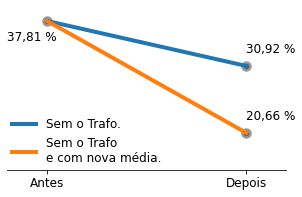

In [18]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(5,3), sharex=True)

A0 = (AIR_AND_TR/HOUSE)*100

A1 = (AIR_CONS/(HOUSE-TR_CONS))*100

A3 = (new_energy_cons/(HOUSE-AIR_AND_TR+new_energy_cons))*100

print(HOUSE, A0, A1, A3)







g = sns.lineplot(x=[0,1], y=[A0, A1], ax=axs, linewidth=4, label='Sem o Trafo.')
g1 = sns.lineplot(x=[0,1], y=[A0, A3], ax=axs, linewidth=4, label='Sem o Trafo\ne com nova média.')

axs.scatter([0], [A0], 30, color='k', alpha=0.4, linewidths=5)
axs.annotate(r'{:.2f} %'.format(A0).replace('.',','),xy=(-0.2, A0-3), xycoords='data')
axs.scatter([1], [A1], 30, color='k', alpha=0.4, linewidths=5)
axs.annotate(r'{:.2f} %'.format(A1).replace('.',','),xy=(1, A1+2), xycoords='data')



axs.scatter([1], [A3], 30, color='k', alpha=0.4, linewidths=5)
axs.annotate(r'{:.2f} %'.format(A3).replace('.',','), xy=(1, A3+2), xycoords='data')



sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=False, offset=None, trim=False)
#g.tick_params(bottom=False)  # remove the ticks
#g.tick_params(left=False)  # remove the ticks
#axs.axes.xaxis.set_visible(False)
axs.set_xticklabels(['','Antes','Depois',''], fontsize=12)

axs.axes.yaxis.set_visible(False)

axs.xaxis.set_major_locator(ticker.MultipleLocator(1))

leg = plt.legend(loc=[0.0,0.0], frameon=False, prop={'family':'Helvetica', 'size':12})
axs.set_xlim(-0.2,1.2)
axs.set_ylim(15,40)

plt.savefig(IMG_PATH + "/saving_plot.svg", dpi=600, pad_inches=0.05, bbox_inches='tight')